<a href="https://colab.research.google.com/github/jesusiv24921/A4/blob/main/A4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests
import timeit
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/jesusiv24921/A4/main/HOMICIDIO.csv')
df.columns

Index(['FECHA HECHO', 'COD_DEPTO', 'DEPARTAMENTO', 'COD_MUNI', 'MUNICIPIO',
       'ZONA', 'SEXO', 'CANTIDAD'],
      dtype='object')

In [4]:
df['FECHA HECHO']=pd.to_datetime(df['FECHA HECHO'], format="%d/%m/%Y")
df['YEAR']=df['FECHA HECHO'].dt.year
df['MONTH']=df['FECHA HECHO'].dt.month
df

df_pivot= df.pivot_table(values='CANTIDAD', index=['DEPARTAMENTO','YEAR','MONTH'], columns=None, aggfunc='sum', fill_value=0)

df_pivot = df_pivot.reset_index()

In [5]:
df_pivot['Date'] = pd.to_datetime(df_pivot['YEAR'].astype(str) + '-' + df_pivot['MONTH'].astype(str), format='%Y-%m')

In [6]:
departamentos=df_pivot['DEPARTAMENTO'].unique().tolist()


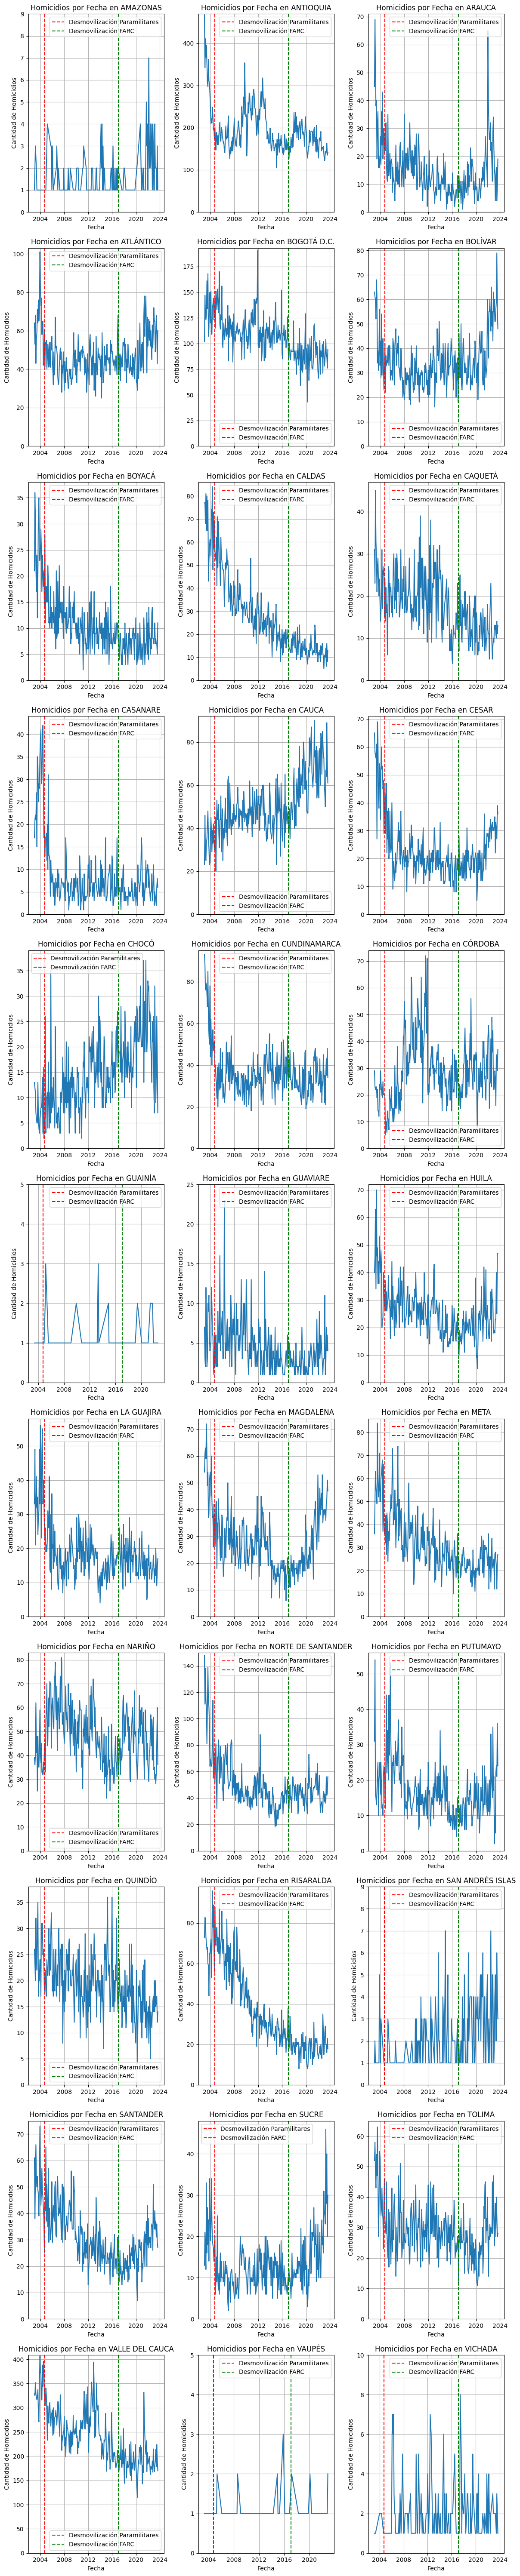

In [25]:
num_filas=11
num_col=3


fig,axs=plt.subplots(num_filas ,num_col, figsize=(12,60))

for i, dpto in enumerate(departamentos):
  fila=i//num_col
  columna=i%num_col

  df_d=df_pivot[df_pivot['DEPARTAMENTO']==dpto]

  axs[fila, columna].plot(df_d['Date'], df_d['CANTIDAD'], '-')
  axs[fila, columna].set_ylim(0,df_d['CANTIDAD'].max()+2)
  axs[fila, columna].set_title(f'Homicidios por Fecha en {dpto}')
  axs[fila, columna].set_xlabel('Fecha')
  axs[fila, columna].set_ylabel('Cantidad de Homicidios')
  axs[fila, columna].axvline(x=pd.to_datetime('2004-10-07'), color='red', linestyle='--', label='Desmovilización Paramilitares')  # Add this line
  # axs[fila, columna].text(pd.to_datetime('2004-10-07'), 0, 'Desmovilización Paramilitares', color='red', ha='left', va='bottom', rotation=90, fontsize=10)
  axs[fila, columna].grid(True)
  axs[fila, columna].axvline(x=pd.to_datetime('2017-02-01'), color='green', linestyle='--', label='Desmovilización FARC')  # Add this line


  axs[fila, columna].legend()



plt.tight_layout()
plt.show()


Agrupación por Año

In [8]:
df_pivot_ano= df.pivot_table(values='CANTIDAD', index=['DEPARTAMENTO','YEAR'], columns=None, aggfunc='sum', fill_value=0)

df_pivot_ano = df_pivot_ano.reset_index()
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

In [9]:
df_pivot_ano

,DEPARTAMENTO,YEAR,CANTIDAD
0,AMAZONAS,2003,13
1,AMAZONAS,2004,5
2,AMAZONAS,2005,11
3,AMAZONAS,2006,10
4,AMAZONAS,2007,8
...,...,...,...
683,VICHADA,2019,19
684,VICHADA,2020,17
685,VICHADA,2021,11
686,VICHADA,2022,18


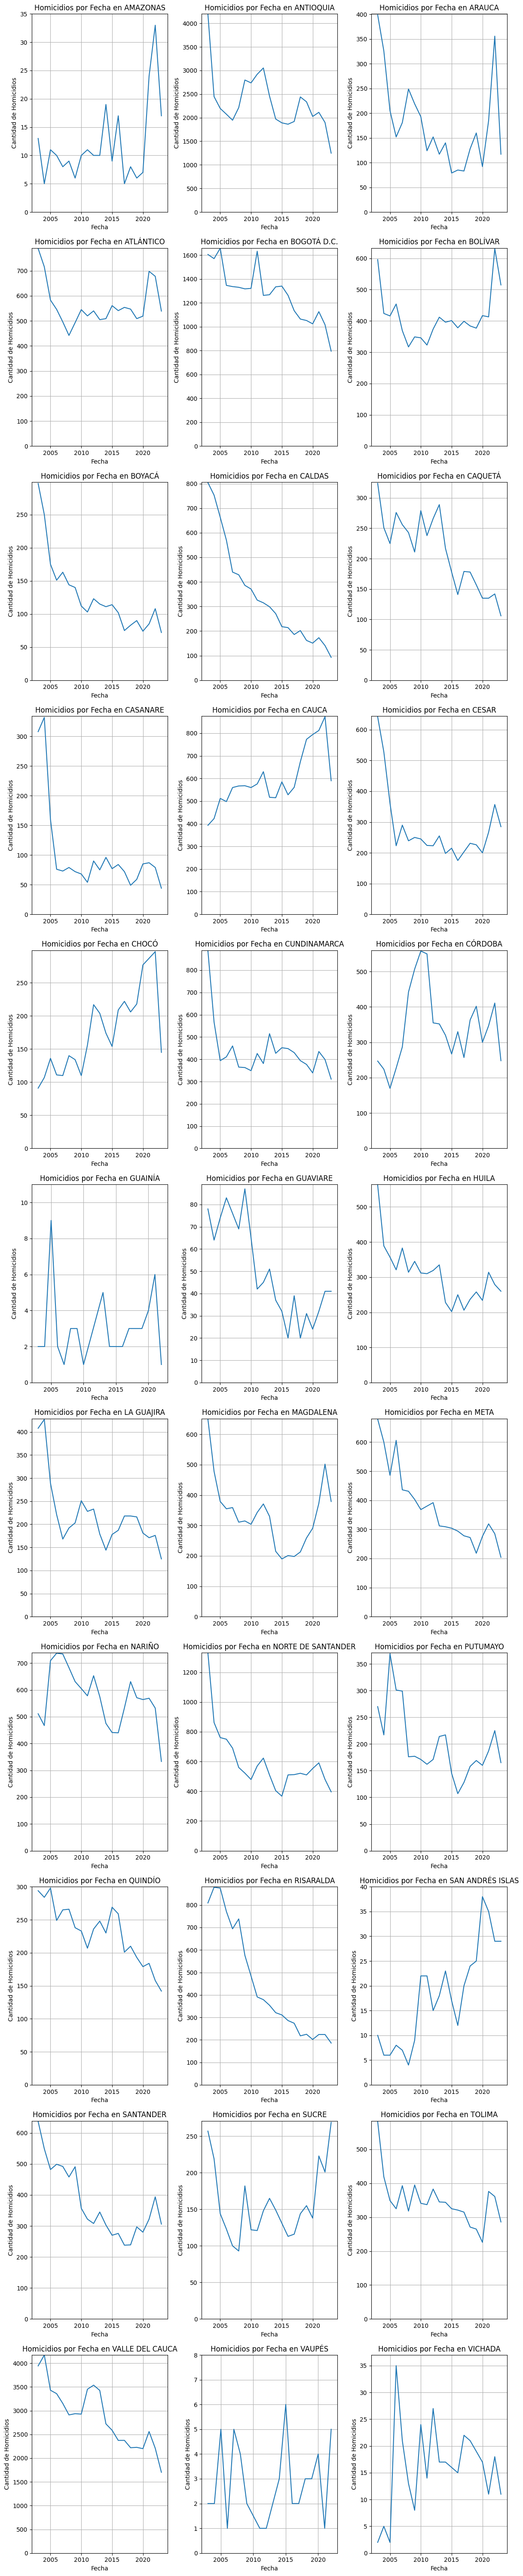

In [10]:
num_filas=11
num_col=3


fig,axs=plt.subplots(num_filas ,num_col, figsize=(12,60))

for i, dpto in enumerate(departamentos):
  fila=i//num_col
  columna=i%num_col

  df_d=df_pivot_ano[df_pivot_ano['DEPARTAMENTO']==dpto]

  axs[fila, columna].plot(df_d['YEAR'], df_d['CANTIDAD'], '-')
  axs[fila, columna].set_ylim(0,df_d['CANTIDAD'].max()+2)
  axs[fila, columna].set_title(f'Homicidios por Fecha en {dpto}')
  axs[fila, columna].set_xlabel('Fecha')
  axs[fila, columna].set_ylabel('Cantidad de Homicidios')
  axs[fila, columna].grid(True)



plt.tight_layout()
plt.show()

In [ ]:
df_pivot_ano.to_csv('/content/df_ano.csv')

In [ ]:
df_pivot_ano

,DEPARTAMENTO,YEAR,CANTIDAD
0,AMAZONAS,2003-01-01,13
1,AMAZONAS,2004-01-01,5
2,AMAZONAS,2005-01-01,11
3,AMAZONAS,2006-01-01,10
4,AMAZONAS,2007-01-01,8
...,...,...,...
683,VICHADA,2019-01-01,19
684,VICHADA,2020-01-01,17
685,VICHADA,2021-01-01,11
686,VICHADA,2022-01-01,18


In [ ]:
df_pivot= df.pivot_table(values='CANTIDAD', index=['DEPARTAMENTO', 'YEAR'], columns=None, aggfunc='sum', fill_value=0)

df_resultado = df_pivot.reset_index()


In [ ]:
df_resultado.columns

Index(['DEPARTAMENTO', 'YEAR', 'CANTIDAD'], dtype='object')

In [ ]:
df_pivot= df.pivot_table(values='CANTIDAD', index=['DEPARTAMENTO', 'YEAR', 'MONTH'], columns=None, aggfunc='sum', fill_value=0)

df_resultado = df_pivot.reset_index()

In [ ]:
df_resultado

,DEPARTAMENTO,YEAR,MONTH,CANTIDAD
0,AMAZONAS,2003,1,1
1,AMAZONAS,2003,2,2
2,AMAZONAS,2003,3,3
3,AMAZONAS,2003,5,2
4,AMAZONAS,2003,6,1
...,...,...,...,...
7516,VICHADA,2023,4,2
7517,VICHADA,2023,6,1
7518,VICHADA,2023,7,3
7519,VICHADA,2023,8,2
